<a href="https://colab.research.google.com/github/kasattack567/Computer-Science/blob/main/Chocolate_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. The Chocolate Bar Problem: A Coding Challenge

##Introduction:
In this problem, I use a heuristic and greedy approach to minimize the number of cuts to the chocolate bars.



In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 51.1 MB/s eta 0:00:00


In [48]:
def chocolate_challenge(bars, children):
    """
    Solves the Chocolate Bar Problem.

    Parameters:
    bars (List[int]): List of chocolate bar lengths.
    children (List[int]): List of chocolate amounts required by each child.

    Returns:
    int: Minimum number of cuts required, or -1 if it's not possible to satisfy all children.
    """
    # Initial check for impossible scenarios
    if sum(bars) < sum(children):
        return -1

    # Sort both lists in descending order
    bars.sort(reverse=True)
    children.sort(reverse=True)

    def remove_matches(bars, children):
        i = 0
        while i < len(children):
            if children[i] in bars:
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1

    remove_matches(bars, children)

    cuts = 0

    while children:
        largest_child = children.pop(0)  # Get the largest child's requirement

        while largest_child > 0:
            if not bars:
                return -1

            largest_bar = bars.pop(0)  # Get the largest bar

            if largest_bar == largest_child:
                # If the bar exactly matches the child's need, no cut is needed
                largest_child = 0
            elif largest_bar > largest_child:
                # If the bar is larger, make a cut and add the remainder back
                cuts += 1
                remainder = largest_bar - largest_child
                if remainder > 0:
                    bars.append(remainder)
                    bars.sort(reverse=True)
                largest_child = 0
            else:
                # If the bar is smaller, subtract it from the child's need
                largest_child -= largest_bar

        remove_matches(bars, children)

    return cuts


# Test cases
test_cases = [
    {"bars": [7, 2, 5], "children": [4, 3, 2, 1], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
    {"bars": [5, 5, 5, 5], "children": [4, 4, 4, 4, 4], "expected": 4},
    {"bars": [13], "children": [1, 5, 4, 3], "expected": 3},
    {"bars": [7, 2, 5], "children": [2, 5], "expected": 0},
]

# Test execution
for i, case in enumerate(test_cases, 1):
    result = chocolate_challenge(case["bars"][:], case["children"][:])
    print(f"Test Case {i}:")
    print(f"Bars: {case['bars']}, Children: {case['children']}")
    print(f"Expected: {case['expected']}, Got: {result}")
    print("PASS" if result == case["expected"] else "FAIL")
    print()


Test Case 1:
Bars: [7, 2, 5], Children: [4, 3, 2, 1]
Expected: 2, Got: 2
PASS

Test Case 2:
Bars: [2, 5], Children: [5, 3]
Expected: -1, Got: -1
PASS

Test Case 3:
Bars: [5, 5, 5, 5], Children: [4, 4, 4, 4, 4]
Expected: 4, Got: 4
PASS

Test Case 4:
Bars: [13], Children: [1, 5, 4, 3]
Expected: 3, Got: 3
PASS

Test Case 5:
Bars: [7, 2, 5], Children: [2, 5]
Expected: 0, Got: 0
PASS



In [5]:
def chocolate_challenge_debug(bars, children):
    """
    Solves the Chocolate Bar Problem with detailed debugging output for every step.

    Parameters:
    bars (List[int]): List of chocolate bar lengths.
    children (List[int]): List of chocolate amounts required by each child.

    Returns:
    int: Minimum number of cuts required, or -1 if it's not possible to satisfy all children.
    """
    # Initial check for impossible scenarios
    if sum(bars) < sum(children):
        print("Impossible to satisfy all children (sum of bars is less than sum of children).")
        return -1

    # Sort both lists in descending order
    bars.sort(reverse=True)
    children.sort(reverse=True)
    print(f"Initial bars: {bars}")
    print(f"Initial children: {children}")
    print("Checking for initial matches...\n")

    def remove_matches(bars, children):
        i = 0
        while i < len(children):
            if children[i] in bars:
                print(f"Match found! Removing {children[i]} from bars and children.")
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1

    remove_matches(bars, children)

    cuts = 0
    print(f"After initial match removal:\nBars: {bars}\nChildren: {children}\n")

    while children:
        largest_child = children.pop(0)  # Get the largest child's requirement
        print(f"Processing largest child: {largest_child}")

        while largest_child > 0:
            if not bars:
                print("No bars left. Cannot satisfy remaining children.")
                return -1

            largest_bar = bars.pop(0)  # Get the largest bar
            print(f"Using bar: {largest_bar}")

            if largest_bar == largest_child:
                # If the bar exactly matches the child's need, no cut is needed
                print(f"Exact match! Bar {largest_bar} satisfies child {largest_child} without a cut.")
                largest_child = 0
            elif largest_bar > largest_child:
                # If the bar is larger, make a cut and add the remainder back
                cuts += 1
                remainder = largest_bar - largest_child
                print(f"Cut made: {largest_bar} - {largest_child} = {remainder}. Total cuts: {cuts}")
                if remainder > 0:
                    bars.append(remainder)
                    bars.sort(reverse=True)
                    print(f"Remaining bar of size {remainder} added back to bars.")
                largest_child = 0
            else:
                # If the bar is smaller, subtract it from the child's need
                largest_child -= largest_bar
                print(f"Bar fully used. Remaining child need: {largest_child}")

        print(f"Current state after processing child:\nBars: {bars}\nChildren: {children}\n")

        remove_matches(bars, children)
        print(f"After match removal:\nBars: {bars}\nChildren: {children}\n")

    return cuts


# Specific Test Case
bars_test = [5,5,5,5]
children_test = [4,4,4,4,4]

print("Running specific test case with debugging...\n")
result = chocolate_challenge_debug(bars_test[:], children_test[:])
print(f"Final Result: {result}")



Running specific test case with debugging...

Initial bars: [5, 5, 5, 5]
Initial children: [4, 4, 4, 4, 4]
Checking for initial matches...

After initial match removal:
Bars: [5, 5, 5, 5]
Children: [4, 4, 4, 4, 4]

Processing largest child: 4
Using bar: 5
Cut made: 5 - 4 = 1. Total cuts: 1
Remaining bar of size 1 added back to bars.
Current state after processing child:
Bars: [5, 5, 5, 1]
Children: [4, 4, 4, 4]

After match removal:
Bars: [5, 5, 5, 1]
Children: [4, 4, 4, 4]

Processing largest child: 4
Using bar: 5
Cut made: 5 - 4 = 1. Total cuts: 2
Remaining bar of size 1 added back to bars.
Current state after processing child:
Bars: [5, 5, 1, 1]
Children: [4, 4, 4]

After match removal:
Bars: [5, 5, 1, 1]
Children: [4, 4, 4]

Processing largest child: 4
Using bar: 5
Cut made: 5 - 4 = 1. Total cuts: 3
Remaining bar of size 1 added back to bars.
Current state after processing child:
Bars: [5, 1, 1, 1]
Children: [4, 4]

After match removal:
Bars: [5, 1, 1, 1]
Children: [4, 4]

Processi

To reduce runtime and the hybird algorithm does the same as before but doesn't check for new matches after every cut. this increases the total number of cuts needed but not by too much and it reduces the runtime massively.

In [9]:
import heapq

def chocolate_challenge_hybrid(bars, children):
    """
    A hybrid approach to the Chocolate Bar Problem that aims to minimize cuts without resorting to exponential complexity.

    Parameters:
    bars (List[int]): List of chocolate bar lengths.
    children (List[int]): List of chocolate amounts required by each child.

    Returns:
    int: Minimum number of cuts required, or -1 if it's not possible to satisfy all children.
    """

    # Quick feasibility check
    print("Initial bars:", bars)
    print("Initial children:", children)
    if sum(bars) < sum(children):
        print("Total chocolate is insufficient. Returning -1.")
        return -1

    # Sort in descending order
    bars.sort(reverse=True)
    children.sort(reverse=True)
    print("Sorted bars:", bars)
    print("Sorted children:", children)

    def remove_matches(bars, children):
        i = 0
        while i < len(children):
            if children[i] in bars:
                print(f"Child requiring {children[i]} matched with a bar.")
                bars.remove(children[i])
                children.pop(i)
            else:
                i += 1

    # Remove exact matches initially
    remove_matches(bars, children)
    print("Bars after removing matches:", bars)
    print("Children after removing matches:", children)
    if not children:
        print("All children satisfied by exact matches. Returning 0.")
        return 0

    # Use a max heap for bars to efficiently get the largest available bar
    max_heap = [-b for b in bars]
    heapq.heapify(max_heap)
    print("Max heap of bars:", [-b for b in max_heap])  # Convert to positive for readability

    cuts = 0

    # Process each child's requirement starting from the largest
    for child_req in children:
        print(f"Processing child requiring {child_req}...")
        total_collected = 0
        used_bars = []

        # Extract bars until we meet or exceed the child's requirement
        while total_collected < child_req and max_heap:
            largest_bar = -heapq.heappop(max_heap)
            used_bars.append(largest_bar)
            total_collected += largest_bar
            print(f"Collected bar {largest_bar}, total_collected: {total_collected}, used_bars: {used_bars}")

        if total_collected < child_req:
            print(f"Not enough chocolate to satisfy child requiring {child_req}. Returning -1.")
            return -1

        # If total_collected exactly matches the child's need, no cuts required.
        if total_collected == child_req:
            print(f"Exact match for child requiring {child_req}. No cuts needed.")
            continue

        # If we exceed the child's requirement, we must make one cut
        leftover = total_collected - child_req
        print(f"Total collected {total_collected} exceeds requirement {child_req}. Leftover: {leftover}")

        if leftover > 0:
            heapq.heappush(max_heap, -leftover)
            cuts += 1
            print(f"Cut made. Leftover {leftover} reinserted into heap. Total cuts: {cuts}")

    # If we processed all children successfully
    print("All children satisfied. Total cuts:", cuts)
    return cuts

# Test cases
test_cases = [
    {"bars": [7, 2, 2,2], "children": [8,5], "expected": 1},

]

# Test execution
for i, case in enumerate(test_cases, 1):
    print(f"Test Case {i}:")
    print(f"Bars: {case['bars']}, Children: {case['children']}")
    result = chocolate_challenge_debug(case["bars"][:], case["children"][:])
    print(f"Expected: {case['expected']}, Got: {result}")
    print("PASS" if result == case["expected"] else "FAIL")
    print("-" * 40)


Test Case 1:
Bars: [7, 2, 2, 2], Children: [8, 5]
Initial bars: [7, 2, 2, 2]
Initial children: [8, 5]
Sorted bars: [7, 2, 2, 2]
Sorted children: [8, 5]
Bars after removing matches: [7, 2, 2, 2]
Children after removing matches: [8, 5]
Max heap of bars: [7, 2, 2, 2]
Processing child requiring 8...
Collected bar 7, total_collected: 7, used_bars: [7]
Collected bar 2, total_collected: 9, used_bars: [7, 2]
Total collected 9 exceeds requirement 8. Leftover: 1
Cut made. Leftover 1 reinserted into heap. Total cuts: 1
Processing child requiring 5...
Collected bar 2, total_collected: 2, used_bars: [2]
Collected bar 2, total_collected: 4, used_bars: [2, 2]
Collected bar 1, total_collected: 5, used_bars: [2, 2, 1]
Exact match for child requiring 5. No cuts needed.
All children satisfied. Total cuts: 1
Expected: 1, Got: 1
PASS
----------------------------------------


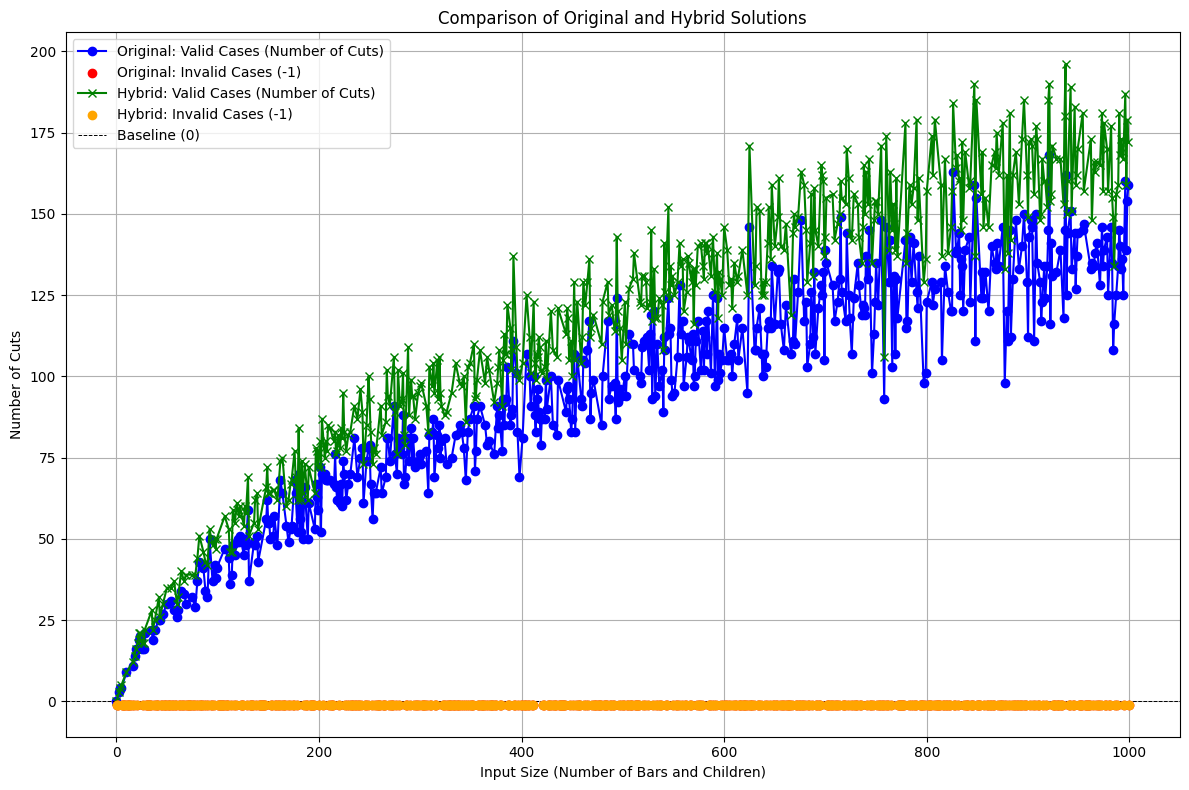

In [26]:
import random
import matplotlib.pyplot as plt
from typing import List

if __name__ == "__main__":
    # Parameters for simulation
    max_size = 1000  # Maximum size of bars/children lists
    step = 1  # Incremental step for the size
    sizes = range(0, max_size + 1, step)

    # Results for original and hybrid solutions
    valid_results_original = []
    invalid_results_original = []
    valid_results_hybrid = []
    invalid_results_hybrid = []

    # Run simulations for increasing input sizes
    for size in sizes:
        bars = [random.randint(1, 100) for _ in range(size)]
        children = [random.randint(1, 100) for _ in range(size)]

        # Original solution
        cuts_original = chocolate_challenge(bars[:], children[:])
        if cuts_original == -1:
            invalid_results_original.append((size, cuts_original))
        else:
            valid_results_original.append((size, cuts_original))

        # Hybrid solution
        cuts_hybrid = chocolate_challenge_hybrid(bars[:], children[:])
        if cuts_hybrid == -1:
            invalid_results_hybrid.append((size, cuts_hybrid))
        else:
            valid_results_hybrid.append((size, cuts_hybrid))

    # Separate valid and invalid points for both solutions
    valid_sizes_original, valid_cuts_original = zip(*valid_results_original) if valid_results_original else ([], [])
    invalid_sizes_original, invalid_cuts_original = zip(*invalid_results_original) if invalid_results_original else ([], [])
    valid_sizes_hybrid, valid_cuts_hybrid = zip(*valid_results_hybrid) if valid_results_hybrid else ([], [])
    invalid_sizes_hybrid, invalid_cuts_hybrid = zip(*invalid_results_hybrid) if invalid_results_hybrid else ([], [])

    # Plot results
    plt.figure(figsize=(12, 8))

    # Original solution valid and invalid points
    if valid_results_original:
        plt.plot(valid_sizes_original, valid_cuts_original, marker='o', linestyle='-', color='blue', label='Original: Valid Cases (Number of Cuts)')
    if invalid_results_original:
        plt.scatter(invalid_sizes_original, invalid_cuts_original, color='red', label='Original: Invalid Cases (-1)', zorder=5)

    # Hybrid solution valid and invalid points
    if valid_results_hybrid:
        plt.plot(valid_sizes_hybrid, valid_cuts_hybrid, marker='x', linestyle='-', color='green', label='Hybrid: Valid Cases (Number of Cuts)')
    if invalid_results_hybrid:
        plt.scatter(invalid_sizes_hybrid, invalid_cuts_hybrid, color='orange', label='Hybrid: Invalid Cases (-1)', zorder=5)

    # Labels and decorations
    plt.title("Comparison of Original and Hybrid Solutions")
    plt.xlabel("Input Size (Number of Bars and Children)")
    plt.ylabel("Number of Cuts")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7, label='Baseline (0)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()




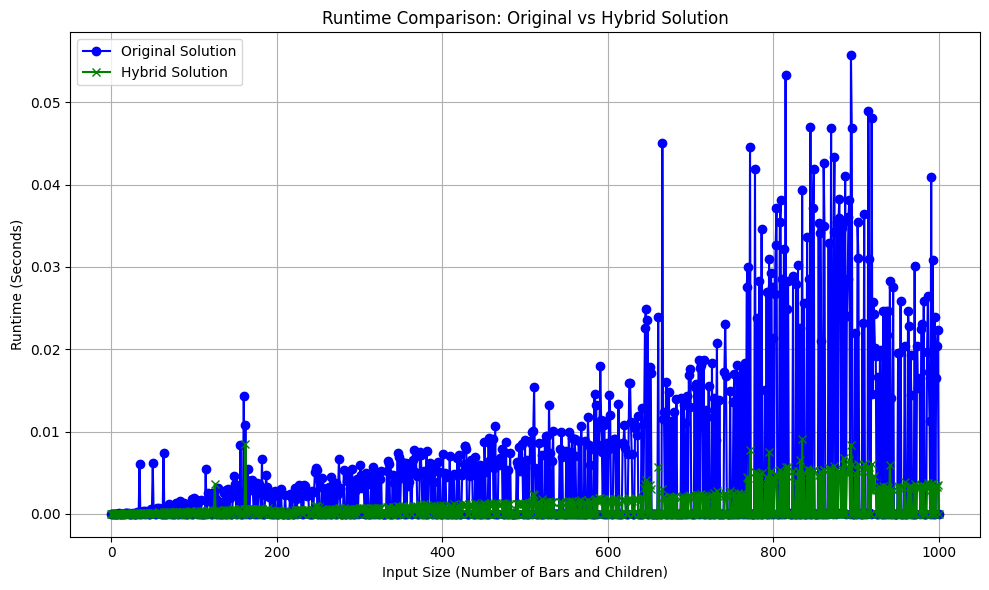

In [43]:
import random
import matplotlib.pyplot as plt
import time

def simulate_and_compare(max_size=1000, step=1):
    # Parameters for simulation
    sizes = range(0, max_size + 1, step)
    runtimes_original = []
    runtimes_hybrid = []

    # Run simulations for increasing input sizes
    for size in sizes:
        bars = [random.randint(1, 100) for _ in range(size)]
        children = [random.randint(1, 100) for _ in range(size)]

        # Measure runtime for the original solution
        start_time = time.time()
        chocolate_challenge(bars[:], children[:])  # Use a copy to avoid mutation issues
        end_time = time.time()
        runtimes_original.append(end_time - start_time)

        # Measure runtime for the hybrid solution
        start_time = time.time()
        chocolate_challenge_hybrid(bars[:], children[:])  # Use a copy to avoid mutation issues
        end_time = time.time()
        runtimes_hybrid.append(end_time - start_time)

    # Plot both runtimes on the same graph
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, runtimes_original, marker='o', linestyle='-', color='blue', label='Original Solution')
    plt.plot(sizes, runtimes_hybrid, marker='x', linestyle='-', color='green', label='Hybrid Solution')
    plt.title("Runtime Comparison: Original vs Hybrid Solution")
    plt.xlabel("Input Size (Number of Bars and Children)")
    plt.ylabel("Runtime (Seconds)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function to simulate and compare
simulate_and_compare(max_size=1000, step=1)
